# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan pada proyek ini yaitu [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data). Dataset diperoleh dari sumber Kaggle.


Dataset ini mengeksplorasi perilaku manusia mengenai extrovert dan introvert. Proyek ini berkaitan dengan psikologis. Terdiri dari 2900 sampel dan 8 fitur.

Berikut informasi mengenai 8 fitur tersebut:
- Time_spent_Alone: Jam yang dihabiskan sendirian setiap hari (0–11).
- Stage_fear: Keberadaan demam panggung (Yes/No).
- Social_event_attendance: Frekuensi menghadiri acara sosial (0–10).
- Going_outside: Frekuensi pergi ke luar rumah (0–7).
- Drained_after_socializing: Merasa lelah setelah bersosialisasi (Yes/No).
- Friends_circle_size: Jumlah teman dekat (0–15).
- Post_frequency: Frekuensi posting di media sosial (0–10).
- Personality: Variabel target (Extrovert/Introvert).*

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Libraries yang sering digunakan
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
# Libraries untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Data loading
df = pd.read_csv('/content/personality_dataset.csv')

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [10]:
# Deskripsi variabel
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [11]:
# Cek duplikasi data dan missing values

print("Jumlah data duplikat:", df.duplicated().sum())

df.isna().sum()

Jumlah data duplikat: 388


,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [12]:
# Cek nilai unique
df.nunique()

,0
Time_spent_Alone,12
Stage_fear,2
Social_event_attendance,11
Going_outside,8
Drained_after_socializing,2
Friends_circle_size,16
Post_frequency,11
Personality,2


In [13]:
# Pengelompokkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Select numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Select categorical columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical Columns: ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [14]:
# Cek nilai unique di kolom kategorikal
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'Stage_fear':
['No' 'Yes' nan]
Unique values in 'Drained_after_socializing':
['No' 'Yes' nan]
Unique values in 'Personality':
['Extrovert' 'Introvert']


**Univariate Analysis**

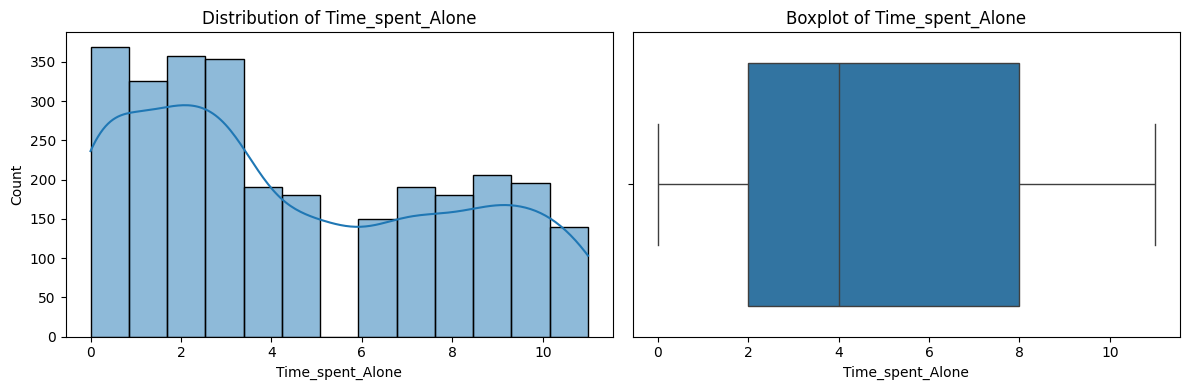

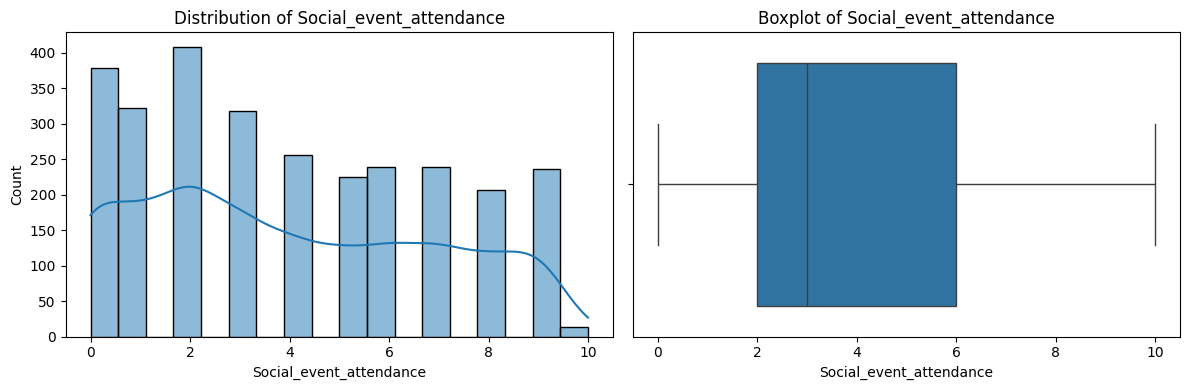

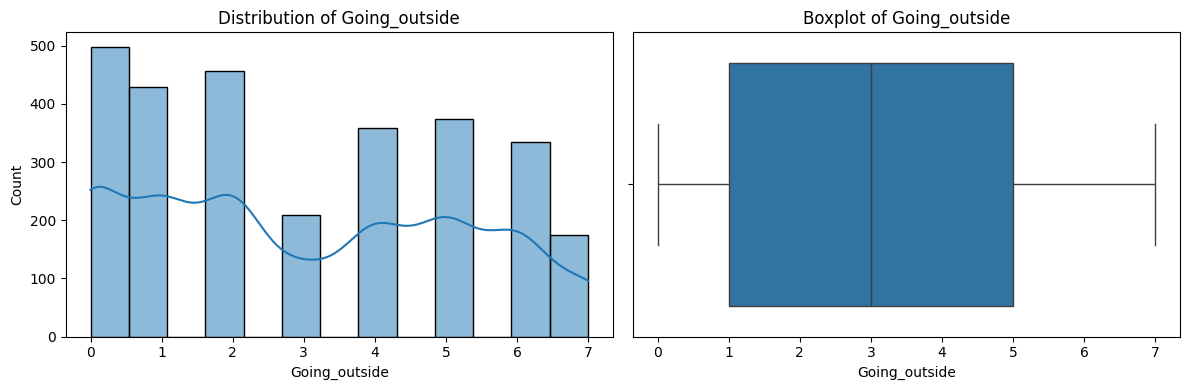

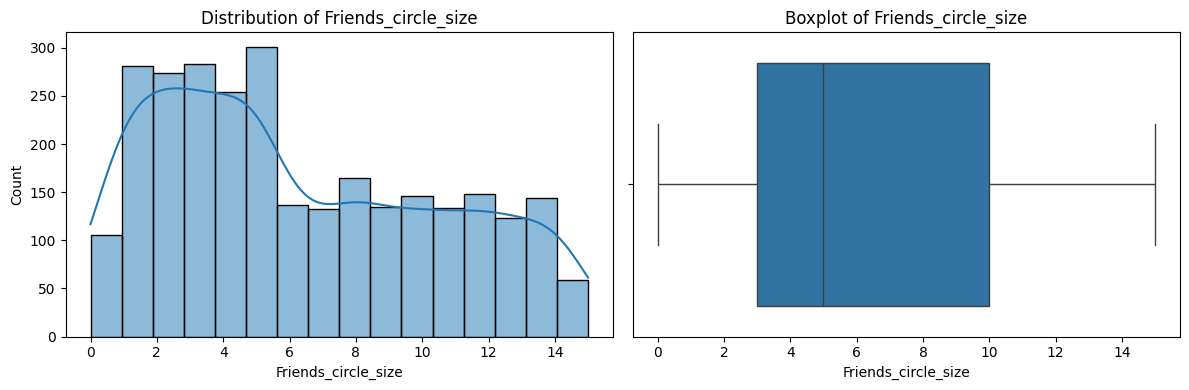

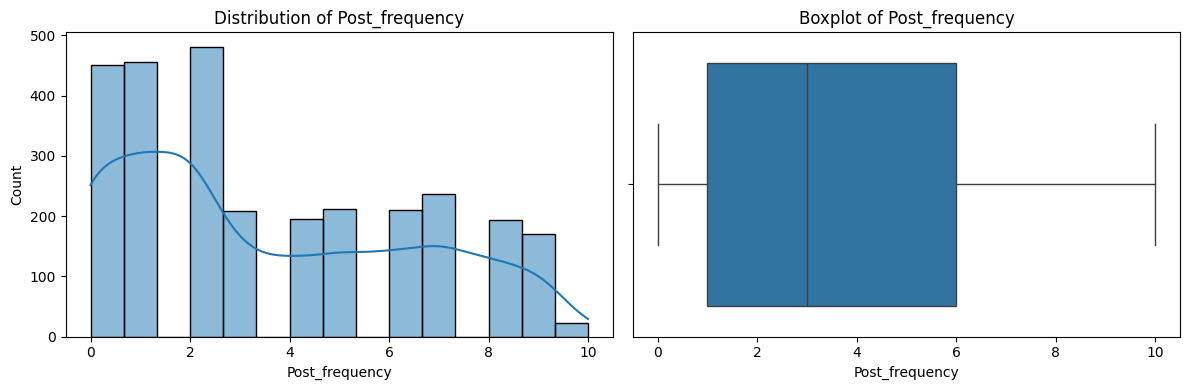

In [15]:
# Histogram + Boxplot untuk kolom numerikal
for col in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribution of {col}')

    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

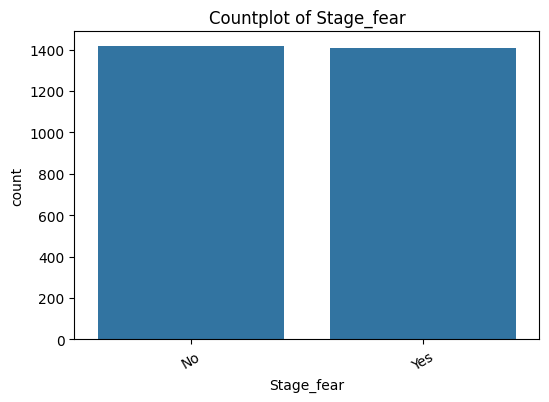

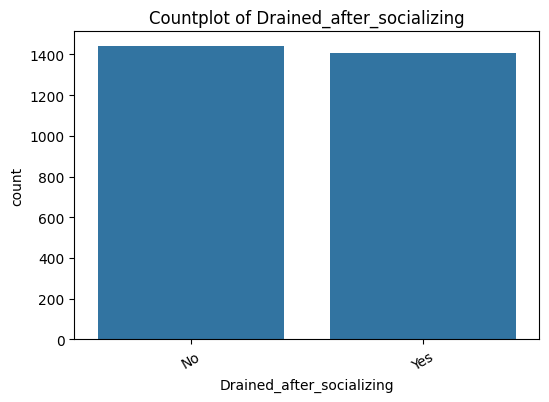

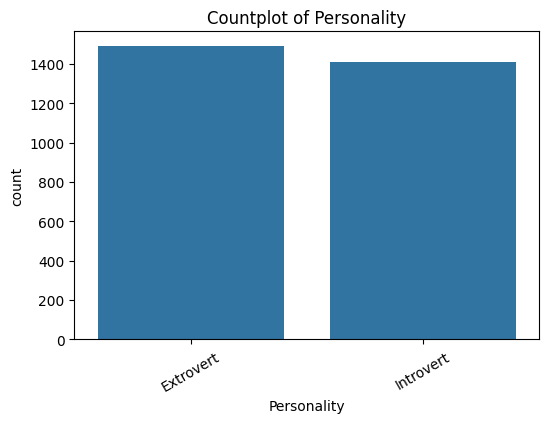

In [16]:
# Distribusi kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=30)
    plt.show()

In [21]:
# Menghitung distribusi label target 'Personality'
personality_counts = df['Personality'].value_counts()

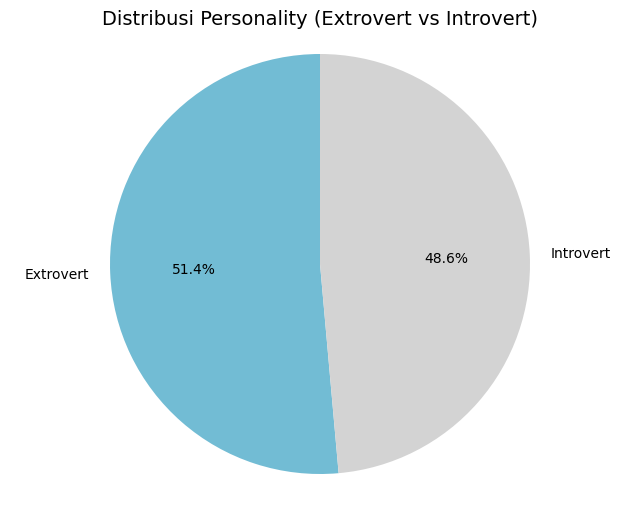

In [25]:
# Visualisasi distribusi label target 'Personality'
plt.figure(figsize=(8, 6))
plt.pie(personality_counts,
        labels=personality_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#72BCD4', '#D3D3D3'],
        # explode=(0.05, 0.05)
        )

plt.title('Distribusi Personality (Extrovert vs Introvert)', fontsize=14)
plt.axis('equal')

plt.show()

**Multivariate Analysis**

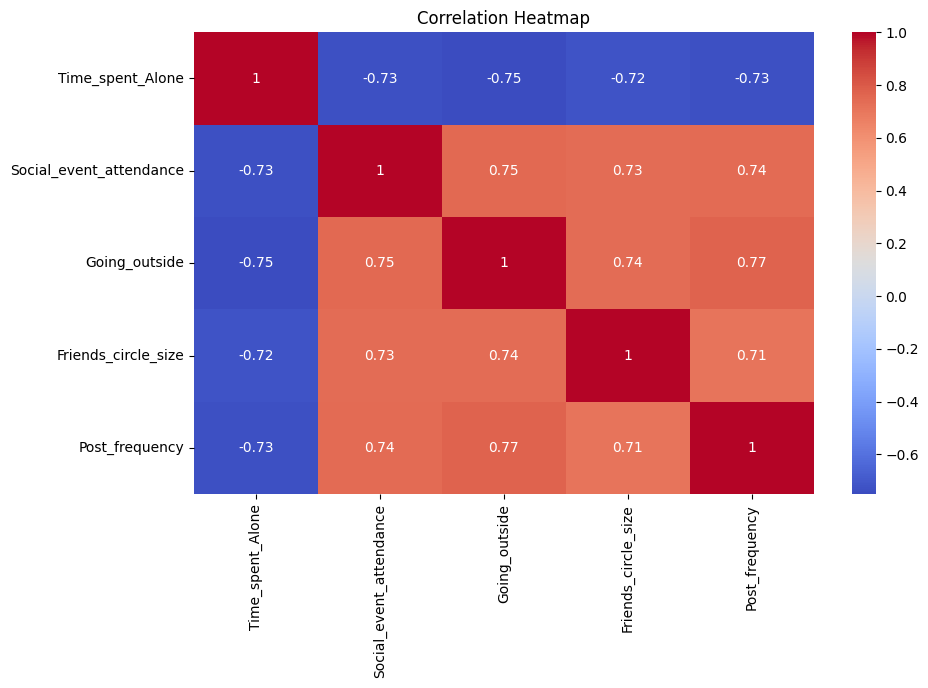

In [17]:
# Correlation Heatmap Kolom Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

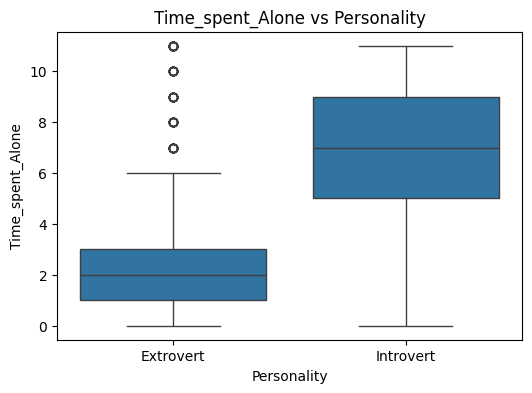

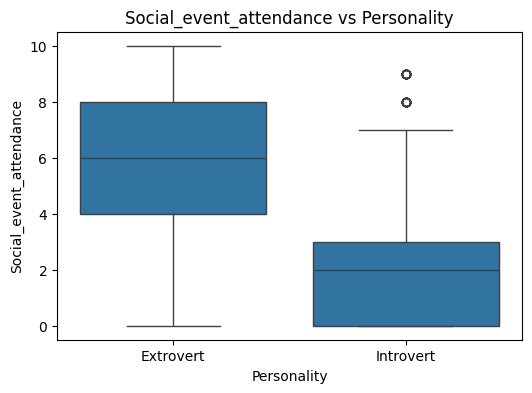

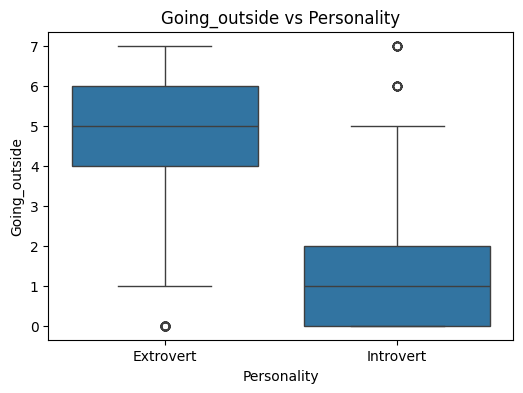

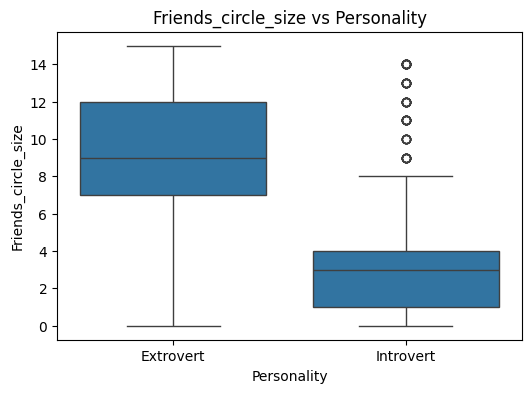

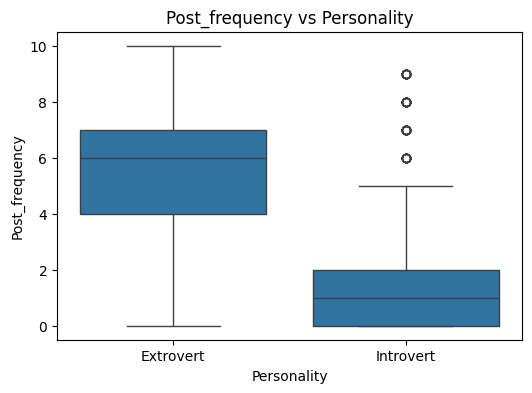

In [18]:
# Distribusi kolom numerik terhadap label target
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} vs Personality')
    plt.show()

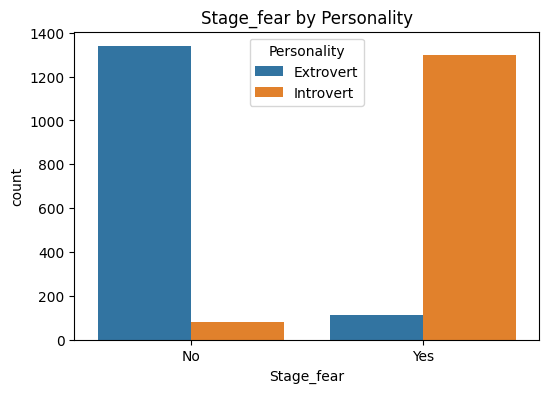

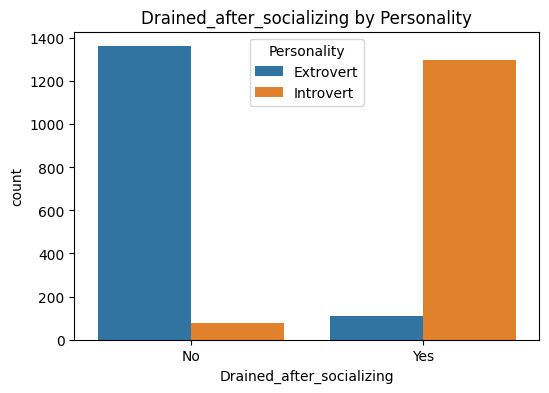

In [19]:
# Distribusi kolom kategorik dengan label target
for col in ['Stage_fear', 'Drained_after_socializing']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Personality', data=df)
    plt.title(f'{col} by Personality')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Salin dataset ke dataframe baru
preparation_df = df.copy()

In [ ]:
# Drop duplikat
preparation_df.drop_duplicates(inplace=True)

In [ ]:
# Imputasi missing value dengan median (numerik) dan modus (kategorikal)
for col in preparation_df.columns:
    if preparation_df[col].dtype == 'object':
        imputasi = preparation_df[col].mode()[0]
    else:
        imputasi = preparation_df[col].median()

    preparation_df[col].fillna(imputasi, inplace=True)

<ipython-input-34-25eaebc4ef07>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preparation_df[col].fillna(imputasi, inplace=True)


In [ ]:
preparation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2512.0,4.179936,3.409212,0.0,1.0,3.0,7.0,11.0
Social_event_attendance,2512.0,4.213774,2.873699,0.0,2.0,4.0,7.0,10.0
Going_outside,2512.0,3.198646,2.216649,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2512.0,6.589172,4.260626,0.0,3.0,6.0,10.0,15.0
Post_frequency,2512.0,3.810510,2.915360,0.0,1.0,3.0,6.0,10.0


In [ ]:
preparation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   object 
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   object 
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [ ]:
# Standarisasi

scaler = StandardScaler()
scaled_features = scaler.fit_transform(preparation_df[numerical_cols])

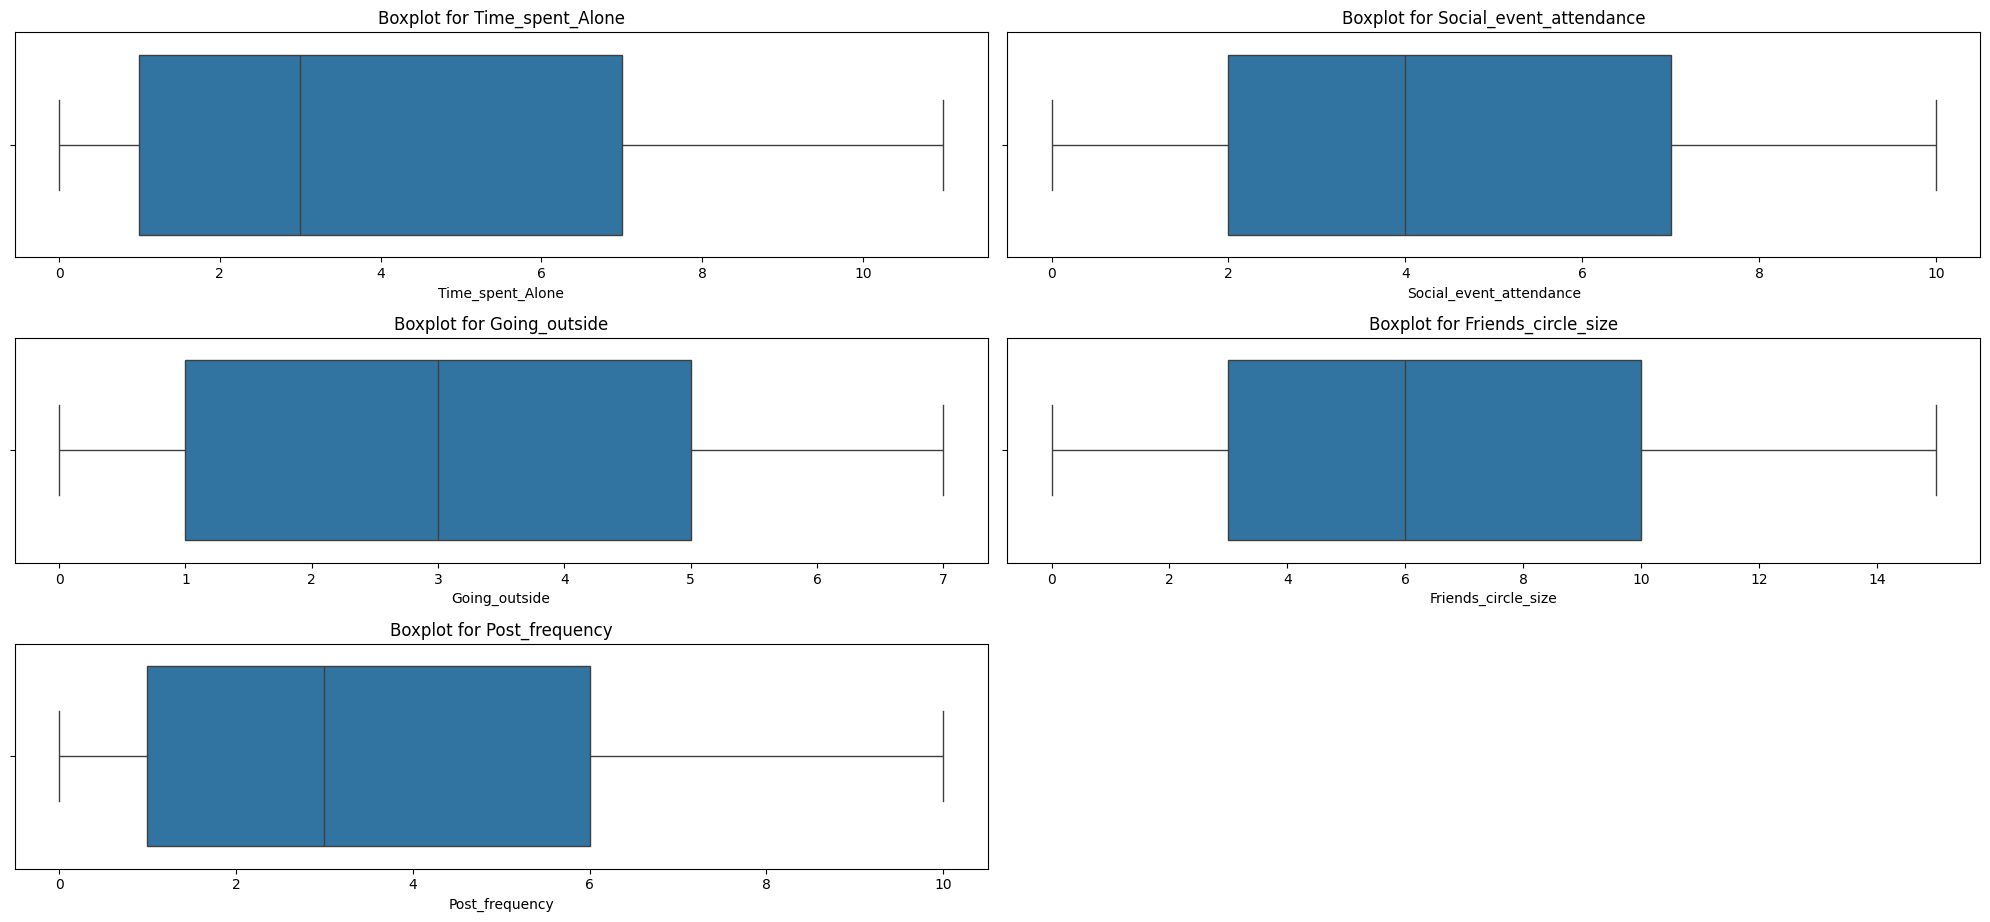

In [ ]:
# Deteksi outlier
plt.figure(figsize=(20, 15))
for i, feature in enumerate(preparation_df[numerical_cols], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=preparation_df[numerical_cols], x=feature)
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Deteksi outliers
for col in numerical_cols:
    Q1 = preparation_df[col].quantile(0.25)
    Q3 = preparation_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = preparation_df[(preparation_df[col] < lower) | (preparation_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Time_spent_Alone: 0 outliers
Social_event_attendance: 0 outliers
Going_outside: 0 outliers
Friends_circle_size: 0 outliers
Post_frequency: 0 outliers


In [ ]:
# Encoding dataset dengan label encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    preparation_df[col] = le.fit_transform(preparation_df[col])
    label_encoders[col] = le

In [ ]:
# Splitting data into train set dan test set

# Fitur dan label
X = preparation_df.drop('Personality', axis=1)
y = preparation_df['Personality']

# Splitting data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menyimpan dataset hasil preprocessing
preparation_df.to_csv('personality_dataset_clean.csv', index=False)

# Menyimpan data latih dan uji ke CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)